## Assignment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset
RawData = pd.read_csv('Batting (1).csv')

In [3]:
print(RawData.shape)
RawData = RawData.fillna(0)
RawData['PA'] = RawData.loc[:,['AB','BB','HBP','SH','SF']].sum(axis = 1).astype(float)

(102816, 25)


In [4]:
RawData.head(10)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,0,1,4,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,addybo01,Bob,Addy,1842,1871,1,RC1,0,25,118,...,8.0,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,122.0
2,allisar01,Art,Allison,1849,1871,1,CL1,0,29,137,...,3.0,1.0,2,5.0,0.0,0.0,0.0,0.0,0.0,139.0
3,allisdo01,Doug,Allison,1846,1871,1,WS3,0,27,133,...,1.0,1.0,0,2.0,0.0,0.0,0.0,0.0,0.0,133.0
4,ansonca01,Cap,Anson,1852,1871,1,RC1,0,25,120,...,6.0,2.0,2,1.0,0.0,0.0,0.0,0.0,0.0,122.0
5,armstbo01,Robert,Armstrong,1850,1871,1,FW1,0,12,49,...,0.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,49.0
6,barkeal01,Al,Barker,1839,1871,1,RC1,0,1,4,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,5.0
7,barnero01,Ross,Barnes,1850,1871,1,BS1,0,31,157,...,11.0,6.0,13,1.0,0.0,0.0,0.0,0.0,0.0,170.0
8,barrebi01,Bill,Barrett,0,1871,1,FW1,0,1,5,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
9,barrofr01,Frank,Barrows,1844,1871,1,BS1,0,18,86,...,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,86.0


In [5]:
RawData.columns

Index(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'stint',
       'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'PA'],
      dtype='object')

In [6]:
#3)	How many players have hit 40 or more HRs in one single season? (Number only)
df_count = RawData.groupby(['playerID','yearID'])['HR'].sum().to_frame(name = 'HR').sort_values('HR',ascending = False).reset_index()
df_count[df_count['HR'] >= 40]['playerID'].nunique()

142

In [7]:
#4)	How many players have hit 600 or more HRs for their career? 
#(Dataframe with name and player first and last name only and amount of HRs)
HR_600 = RawData.groupby(['playerID','nameFirst','nameLast'])['HR'].sum().to_frame(name = 'HR').sort_values('HR',ascending = False).reset_index()

In [8]:
HR_600 = HR_600[HR_600['HR'] >= 600]
HR_600

,playerID,nameFirst,nameLast,HR
0,bondsba01,Barry,Bonds,762
1,aaronha01,Hank,Aaron,755
2,ruthba01,Babe,Ruth,714
3,rodrial01,Alex,Rodriguez,696
4,mayswi01,Willie,Mays,660
5,griffke02,Ken,Griffey,630
6,thomeji01,Jim,Thome,612
7,sosasa01,Sammy,Sosa,609


In [9]:
#5)	How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or 
# more, and 30 HRs or more in one season? (Number Only)
Unique_df = RawData.groupby(['playerID','yearID'])['2B','3B','H','HR'].sum().reset_index()

In [10]:
Unique_df = Unique_df[(Unique_df['2B'] >= 40) & (Unique_df['3B'] >= 10) & (Unique_df['H'] >= 200) & (Unique_df['HR'] >= 30 ) ]
Unique_df['playerID'].nunique()

11

In [11]:
#6)	How many players seasons have had 100 or more SBs? 
#(Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )
countSB = RawData.groupby(['playerID','nameFirst','nameLast','yearID'])['SB'].sum().to_frame(name = 'SB').sort_values('SB',ascending = False).reset_index()
countSB = countSB[countSB['SB'] >= 100]
countSB

,playerID,nameFirst,nameLast,yearID,SB
0,nicolhu01,Hugh,Nicol,1887,138.0
1,henderi01,Rickey,Henderson,1982,130.0
2,lathaar01,Arlie,Latham,1887,129.0
3,brocklo01,Lou,Brock,1974,118.0
4,comisch01,Charlie,Comiskey,1887,117.0
5,hamilbi01,Billy,Hamilton,1889,111.0
6,wardjo01,John,Ward,1887,111.0
7,hamilbi01,Billy,Hamilton,1891,111.0
8,colemvi01,Vince,Coleman,1985,110.0
9,colemvi01,Vince,Coleman,1987,109.0


In [12]:
#7)	How many players in the 1960s (yearID) have hit 200 or more HRs? 
#(Dataframe, first name, last name, number of HRs, ordered descending by HR amt)
hr1960 = RawData[(RawData['yearID']>=1960) & (RawData['yearID']<=1969)].groupby(['playerID','nameFirst','nameLast'])['HR'].sum().to_frame(name = 'HR').sort_values('HR',ascending = False).reset_index()
hr1960[hr1960['HR'] >= 200].drop(hr1960[['playerID']],axis = 1)

,nameFirst,nameLast,HR
0,Harmon,Killebrew,393
1,Hank,Aaron,375
2,Willie,Mays,350
3,Frank,Robinson,316
4,Willie,McCovey,300
5,Frank,Howard,288
6,Norm,Cash,278
7,Ernie,Banks,269
8,Mickey,Mantle,256
9,Orlando,Cepeda,254


In [13]:
#8)	Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)
hrMost = RawData.groupby(['playerID','nameFirst','nameLast'])['HR'].sum().to_frame(name = 'HR').sort_values('HR',ascending = False).reset_index()
hrMost.drop(hrMost[['playerID']],axis = 1).head(1)

,nameFirst,nameLast,HR
0,Barry,Bonds,762


In [14]:
#9)	Who had the most hits (H) in the 1970s? (Dataframe)
h1970 = RawData[(RawData['yearID']>=1970) & (RawData['yearID']<=1979)].groupby(['playerID','nameFirst','nameLast'])['H'].sum().to_frame(name = 'H').sort_values('H',ascending = False).reset_index()
h1970.nlargest(1,'H')

,playerID,nameFirst,nameLast,H
0,rosepe01,Pete,Rose,2045


In [15]:
# 10)Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  
#(Dataframe, first name, last name, OBP, ordered descending by OBP)
obp1970 = RawData[RawData['yearID']==1977].groupby(['playerID','nameFirst','nameLast']).sum()
obp1970['PA'] = obp1970.loc[:,['AB','BB','HBP','SH','SF']].sum(axis = 1)
obp1970 = obp1970[obp1970['PA'] >= 500]
obp1970['OBP'] = (obp1970['H'] +obp1970['IBB']+obp1970['HBP'])/(obp1970['AB']+obp1970['IBB']+obp1970['HBP'] +obp1970['SF'])
obp1970 = obp1970.sort_values('OBP',ascending=False).reset_index()
obp1970['Rank'] = obp1970['OBP'].rank(method = 'min',ascending = False).astype(int)
obp1970 = obp1970[obp1970['Rank'] <= 5].loc[:,['nameFirst','nameLast','OBP']]
obp1970

,nameFirst,nameLast,OBP
0,Rod,Carew,0.402191
1,Dave,Parker,0.355522
2,Ted,Simmons,0.349177
3,Lyman,Bostock,0.343137
4,Ken,Singleton,0.342908


In [16]:
#11)op 8 highest averages in 2013 with at least 300 PAs? (Dataframe, 
#first name, last name, average, descending by average) (batting averge)
BA2013 = RawData[(RawData['yearID']==2013) & (RawData['PA'] >= 300)].groupby(['playerID','nameFirst','nameLast']).sum()
BA2013['BA'] = BA2013['H']/BA2013['AB']
BA2013 = BA2013.sort_values('BA',ascending=False).reset_index()
BA2013['Rank'] = BA2013['BA'].rank(method = 'min',ascending = False).astype(int)
BA2013 = BA2013[BA2013['Rank'] <= 8].loc[:,['nameFirst','nameLast','BA']]
BA2013

,nameFirst,nameLast,BA
0,Miguel,Cabrera,0.347748
1,Hanley,Ramirez,0.345395
2,Michael,Cuddyer,0.331288
3,Joe,Mauer,0.323596
4,Mike,Trout,0.322581
5,Chris,Johnson,0.321012
6,Freddie,Freeman,0.319419
7,Yasiel,Puig,0.319372


In [17]:
#12)Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits) (aggregate)
# hitLeader = RawData[(RawData['yearID']>=1940) & (RawData['yearID'] <= 1949)].groupby(['yearID','playerID','nameFirst','nameLast',]).sum().sort_values(['yearID','H'], ascending= False)
hitLeader= RawData[(RawData['yearID']>=1940) & (RawData['yearID'] <= 1949)].groupby(['yearID','playerID','nameFirst','nameLast'])['H'].sum().to_frame(name = 'H').sort_values(['yearID','H'], ascending= False).reset_index()
hitLeader['Rank'] = hitLeader.groupby(['yearID'])['H'].rank(method = 'min',ascending = False).astype(int)
hitLeader[hitLeader['Rank'] == 1]

,yearID,playerID,nameFirst,nameLast,H,Rank
0,1949,musiast01,Stan,Musial,207,1
532,1948,musiast01,Stan,Musial,230,1
1074,1947,peskyjo01,Johnny,Pesky,207,1
1618,1946,musiast01,Stan,Musial,228,1
2251,1945,holmeto01,Tommy,Holmes,224,1
2798,1944,stirnsn01,Snuffy,Stirnweiss,205,1
3346,1943,musiast01,Stan,Musial,220,1
3865,1942,peskyjo01,Johnny,Pesky,205,1
4377,1941,travice01,Cecil,Travis,218,1
4923,1940,cramedo01,Doc,Cramer,200,1


In [18]:
#13) Who led MLB with the most hits the most times?  
#And how many times? 65 (Dataframe, Number of hits) (Who ever led x times a year. Max #of hits year Id = x )`
hitcount = RawData.groupby(['yearID','playerID','nameFirst','nameLast'])['H'].sum().to_frame(name = 'H').reset_index()
hitcount['Rank'] = hitcount.groupby('yearID')['H'].rank(method = 'min',ascending = False).astype(int)
# hitcount[hitcount['Rank'] == 1].groupby(['playerID','nameFirst','nameLast'])['Rank'].count().to_frame(name = 'cnt').sort_values('cnt',ascending = False)
hitcount = hitcount[hitcount['Rank'] == 1].groupby(['playerID','nameFirst','nameLast']).agg({'H':'sum','Rank':'count'}).reset_index().rename(columns={'Rank':'topCount'})
hitcount['TopRank'] = hitcount['topCount'].rank(method = 'min',ascending = False)
hitcount[hitcount['TopRank'] ==1]

,playerID,nameFirst,nameLast,H,topCount,TopRank
22,cobbty01,Ty,Cobb,1526,7,1.0
75,rosepe01,Pete,Rose,1407,7,1.0
85,suzukic01,Ichiro,Suzuki,1618,7,1.0


In [19]:
#Which players have played the most games for their careers?  
#Top 5 first name, last name, descending by games played presented as a dataframe
higPlayed = RawData.groupby(['playerID','nameFirst','nameLast'])['G'].sum().reset_index().sort_values('G',ascending = False)
higPlayed['Rank'] = higPlayed['G'].rank(method = 'min',ascending = False)
higPlayed = higPlayed[higPlayed['Rank'] <=5]
higPlayed

,playerID,nameFirst,nameLast,G,Rank
14719,rosepe01,Pete,Rose,3562,1.0
18728,yastrca01,Carl,Yastrzemski,3308,2.0
1,aaronha01,Hank,Aaron,3298,3.0
7383,henderi01,Rickey,Henderson,3081,4.0
3155,cobbty01,Ty,Cobb,3035,5.0


In [20]:
#15)How many players have had more 3000 or more hits for their careers 
#while also hitting 500 or more HRs?  Just a number is okay here
careerHits = RawData.groupby('playerID')[['H','HR']].sum().reset_index()
# careerHits
careerHits[(careerHits['H'] >= 3000) & (careerHits['HR'] >= 500)]['playerID'].count()

5

In [21]:
#16) How many HRs were hit during the entire 1988 season?  Just a number is okay here
RawData[RawData['yearID'] == 1988]['HR'].sum()

3180

In [22]:
#17 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons 
#in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average
wadeAvg = RawData[(RawData['nameFirst'] == 'Wade') & (RawData['nameLast']=='Boggs')].groupby(['playerID','nameFirst','nameLast','yearID']).sum().reset_index()
# wadeAvg
wadeAvg = wadeAvg[(wadeAvg['AB']>= 500)].groupby(['playerID','nameFirst','nameLast','yearID'])['H','AB'].sum().reset_index().assign(BA = lambda x:x.H/x.AB)
wadeAvg = wadeAvg.assign(Rank = wadeAvg['BA'].rank(method = 'min',ascending = False).astype(int)).sort_values('BA',ascending = False)
wadeAvg = wadeAvg[wadeAvg['Rank'] <= 3].loc[:,['nameFirst','nameLast','BA']]
wadeAvg


,nameFirst,nameLast,BA
2,Wade,Boggs,0.367534
5,Wade,Boggs,0.366438
4,Wade,Boggs,0.362976


In [23]:
#18)Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, 
#sorted by OBP descending.  Dataframe with first name, last name, OBP
obp1995 = RawData[RawData['yearID']==1995].groupby(['playerID','nameFirst','nameLast']).sum()
obp1995['PA'] = obp1995.loc[:,['AB','BB','HBP','SH','SF']].sum(axis = 1)
obp1995 = obp1995[obp1995['PA'] >= 400]
obp1995['OBP'] = (obp1995['H'] +obp1995['BB']+obp1995['HBP'])/(obp1995['AB']+obp1995['BB']+obp1995['HBP'] +obp1995['SF'])
obp1995 = obp1995.sort_values('OBP',ascending=False).reset_index()
obp1995['Rank'] = obp1995['OBP'].rank(method = 'dense',ascending = False).astype(int)
obp1995 = obp1995[obp1995['Rank'] <= 10].loc[:,['nameFirst','nameLast','OBP']]
obp1995

,nameFirst,nameLast,OBP
0,Edgar,Martinez,0.478873
1,Frank,Thomas,0.454405
2,Mark,McGwire,0.440758
3,Jim,Thome,0.438061
4,Barry,Bonds,0.431496
5,Tim,Salmon,0.429467
6,Chili,Davis,0.429119
7,Dave,Magadan,0.427553
8,Chuck,Knoblauch,0.424483
9,Tim,Naehring,0.414729


In [24]:
#19Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  
#I would like a dataframe with first name, last name, number of 3Bs (one person or multiple in case of a tie)
most3B = RawData[RawData['yearID'].isin(['1922','1925','1926','1928'])].groupby(['playerID','nameFirst','nameLast'])['3B'].sum().to_frame(name = '3B').reset_index()
most3B['Rank']=most3B['3B'].rank(method = 'min',ascending = False)
most3B = most3B[most3B['Rank'] == 1]
most3B

,playerID,nameFirst,nameLast,3B,Rank
1011,walkecu01,Curt,Walker,59,1.0


In [25]:
#20)How many unique players have hit 30 or more HRs in season while also 
#stealing (SB) 30 more or bases?  A number is okay here
hitnsteal = RawData.groupby(['playerID','yearID'])['HR','SB'].sum().reset_index()
hitnsteal[(hitnsteal['HR'] >= 30) & (hitnsteal['SB'] >= 30)]['playerID'].nunique()
# most3B = most3B[most3B['Rank'] == 1]
# hitnsteal

38

In [26]:
# 21)Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)
obp1986 = RawData[RawData['yearID']==1986].groupby(['playerID','nameFirst','nameLast']).sum()
# obp1986['PA'] = obp1986.loc[:,['AB','BB','HBP','SH','SF']].sum(axis = 1)
obp1986 = obp1986[obp1986['AB'] >= 400]
obp1986['OBP'] = (obp1986['H'] + obp1986['BB']+obp1986['HBP'])/(obp1986['AB']+obp1986['BB']+obp1986['HBP'] +obp1986['SF'])
obp1986 = obp1986.sort_values('OBP',ascending=False).reset_index()
obp1986['Rank'] = obp1986['OBP'].rank(method = 'min',ascending = False).astype(int)
obp1986 = obp1986[obp1986['Rank'] <= 1].loc[:,['nameFirst','nameLast','OBP']]
obp1986

,nameFirst,nameLast,OBP
0,Wade,Boggs,0.45283


In [27]:
# 22)Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)
obp1997 = RawData[(RawData['yearID']==1997) & (RawData['lgID']=='NL')].groupby(['playerID','nameFirst','nameLast']).sum()
obp1997 = obp1997[obp1997['AB'] >= 400]
obp1997['OBP'] = (obp1997['H'] + obp1997['BB']+obp1997['HBP'])/(obp1997['AB']+obp1997['BB']+obp1997['HBP'] +obp1997['SF'])
obp1997 = obp1997.sort_values('OBP',ascending=False).reset_index()
obp1997['Rank'] = obp1997['OBP'].rank(method = 'min',ascending = False).astype(int)
obp1997 = obp1997[obp1997['Rank'] <= 1].loc[:,['nameFirst','nameLast','OBP']]
obp1997

,nameFirst,nameLast,OBP
0,Larry,Walker,0.451807


In [28]:
#23) Who had more than the league average HRs (for players with 500 or more ABs) in 2012 
#(filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending) 
#(aggregate, league ID doesn’t matter)
LAvg = RawData[(RawData['AB'] >= 500) & (RawData['yearID']==2012)].groupby(['playerID','nameFirst','nameLast','yearID'])['HR'].mean().reset_index()
LAvg = LAvg.join(LAvg.groupby('yearID').mean(), on = 'yearID' , rsuffix = '_ovl').sort_values('HR',ascending = False)
LAvg = LAvg[LAvg['HR'] > LAvg['HR_ovl']].loc[:,['nameFirst','nameLast','HR']]
LAvg

,nameFirst,nameLast,HR
18,Miguel,Cabrera,44
43,Josh,Hamilton,43
42,Curtis,Granderson,43
30,Edwin,Encarnacion,42
29,Adam,Dunn,41
14,Ryan,Braun,41
10,Adrian,Beltre,36
101,Josh,Willingham,35
15,Jay,Bruce,34
19,Robinson,Cano,33


In [29]:
#24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)
young50 = RawData.groupby(['playerID','nameFirst','nameLast','birthYear','yearID'])['HR'].sum().to_frame(name = 'HR').reset_index().assign(Age = lambda x: (x.yearID - x.birthYear)+1)
young50 = young50[young50['HR'] >= 50].sort_values('Age')
young50['Rank'] = young50['Age'].rank(method = 'min')
young50 = young50[young50['Rank'] == 1][['nameFirst','nameLast','HR','yearID']]
young50

,nameFirst,nameLast,HR,yearID
26282,Prince,Fielder,50,2007


In [30]:
#25)Who are the five youngest players to hit 300 or more HRs for their career?
#(Dataframe, first name, last name, season they eclipsed more than 300 HRs)
young300= RawData.sort_values(['playerID','nameFirst','nameLast','birthYear','yearID']).groupby(['playerID','nameFirst','nameLast','birthYear','yearID'])['HR'].sum().groupby(level = 0).cumsum().to_frame(name = 'cumHR').reset_index().assign(Age = lambda x: (x.yearID - x.birthYear)+1)
young300 = young300[young300['cumHR'] >= 300].groupby('playerID').first().sort_values('Age')
young300['Rank'] = young300['Age'].rank(method = 'min')
young300 = young300[young300['Rank'] <= 5].loc[:,['nameFirst','nameLast','yearID']]
young300

,nameFirst,nameLast,yearID
playerID,,,
foxxji01,Jimmie,Foxx,1935
ottme01,Mel,Ott,1937
pujolal01,Albert,Pujols,2008
jonesan01,Andruw,Jones,2005
rodrial01,Alex,Rodriguez,2003


In [31]:
# Additional assignment
#Graph total HRs per season using bar graph
totHR = RawData.groupby('yearID')['HR'].sum().to_frame(name = 'totHR').reset_index()
# totHR = RawData.groupby('yearID')['HR'].sum().plot.bar()
# plt.show()
# totHR

Text(0.5,1,'HR across season')

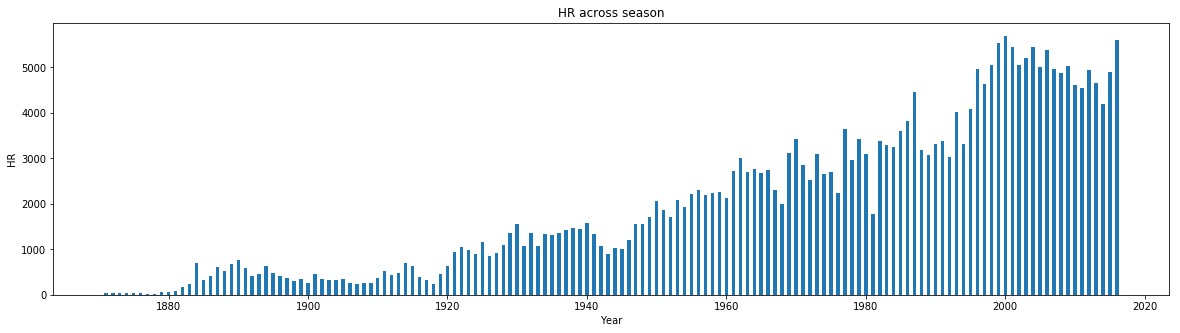

In [32]:
fig, axes = plt.subplots(figsize=(20,5))

axes.bar(totHR['yearID'], totHR['totHR'],width=0.5)
axes.set_xlabel('Year')
axes.set_ylabel('HR')
axes.set_title('HR across season')

Text(0.5,1,'HR/AB across season')

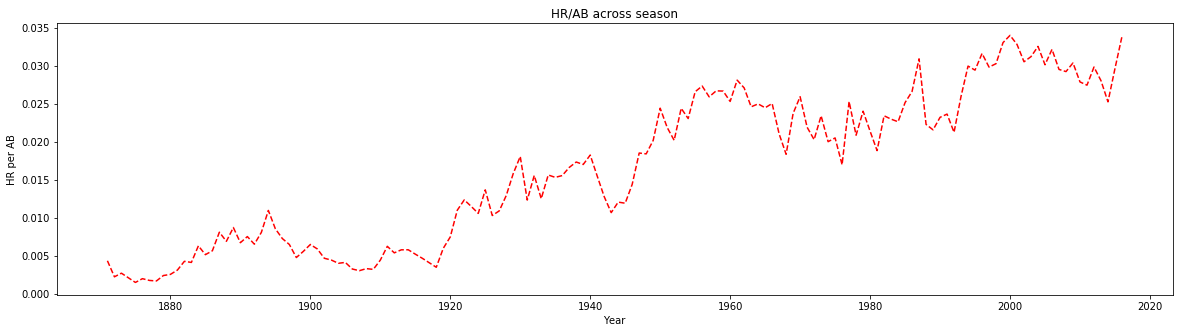

In [33]:
# Using a line graph please graph the average (HRs per AB) (think about this) per season
ABtot = RawData.groupby('yearID').agg({'HR':'sum','AB':'sum'}).reset_index().assign(HRperAB =lambda x: x.HR/x.AB)
# .groupby('yearID')['HRperAB'].mean().reset_index()
fig, axes = plt.subplots(figsize=(20,5))
axes.plot(ABtot['yearID'], ABtot['HRperAB'],'r--')
axes.set_xlabel('Year')
axes.set_ylabel('HR per AB')
axes.set_title('HR/AB across season')